In [1]:
# Basic libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Load the dataset (update the file path if necessary)
df = pd.read_csv('CleanedThyroid.csv')

# Display the first few rows
print("First 5 rows of the dataset:")
print(df.head())

# Basic information about the dataset
print("\nDataset Info:")
df.info()

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


First 5 rows of the dataset:
   ID  AGE SEX ON_THYROXINE QUERY_ON_THYROXINE ON_ANTITHYROID_MEDICATION SICK  \
0   1   41   F            f                  f                         f    f   
1   2   23   F            f                  f                         f    f   
2   3   46   M            f                  f                         f    f   
3   4   70   F            t                  f                         f    f   
4   5   70   F            f                  f                         f    f   

  PREGNANT THYROID_SURGERY I131_TREATMENT  ... TT4_MEASURED    TT4  \
0        F               f              f  ...            t  125.0   
1        F               f              f  ...            t  102.0   
2        F               f              f  ...            t  109.0   
3        F               f              f  ...            t  175.0   
4        F               f              f  ...            t   61.0   

  T4U_MEASURED   T4U FTI_MEASURED  FTI TBG_MEASURED TBG  REFERR

In [3]:
# Check for missing values
print("Missing Values in Dataset:")
print(df.isnull().sum())


Missing Values in Dataset:
ID                             0
AGE                            0
SEX                          150
ON_THYROXINE                   0
QUERY_ON_THYROXINE             0
ON_ANTITHYROID_MEDICATION      0
SICK                           0
PREGNANT                       0
THYROID_SURGERY                0
I131_TREATMENT                 0
QUERY_HYPOTHYROID              0
QUERY_HYPERTHYROID             0
LITHIUM                        0
GOITRE                         0
TUMOR                          0
HYPOPITUITARY                  0
PSYCH                          0
TSH_MEASURED                   0
TSH                            0
T3_MEASURED                    0
T3                             0
TT4_MEASURED                   0
TT4                            0
T4U_MEASURED                   0
T4U                            0
FTI_MEASURED                   0
FTI                            0
TBG_MEASURED                   0
TBG                            0
REFERRAL_SOURCE 

In [4]:
# Drop rows where 'sex' is missing
df = df.dropna(subset=['SEX'])

# Verify the changes
print("Missing Values After Dropping Rows:")
print(df['SEX'].isnull().sum())
print(f"Updated Dataset Shape: {df.shape}")


Missing Values After Dropping Rows:
0
Updated Dataset Shape: (3621, 31)


In [5]:
# Check for missing values
print("Missing Values in Dataset:")
print(df.isnull().sum())

Missing Values in Dataset:
ID                           0
AGE                          0
SEX                          0
ON_THYROXINE                 0
QUERY_ON_THYROXINE           0
ON_ANTITHYROID_MEDICATION    0
SICK                         0
PREGNANT                     0
THYROID_SURGERY              0
I131_TREATMENT               0
QUERY_HYPOTHYROID            0
QUERY_HYPERTHYROID           0
LITHIUM                      0
GOITRE                       0
TUMOR                        0
HYPOPITUITARY                0
PSYCH                        0
TSH_MEASURED                 0
TSH                          0
T3_MEASURED                  0
T3                           0
TT4_MEASURED                 0
TT4                          0
T4U_MEASURED                 0
T4U                          0
FTI_MEASURED                 0
FTI                          0
TBG_MEASURED                 0
TBG                          0
REFERRAL_SOURCE              0
BINARYCLASS                  0
dtype: int64

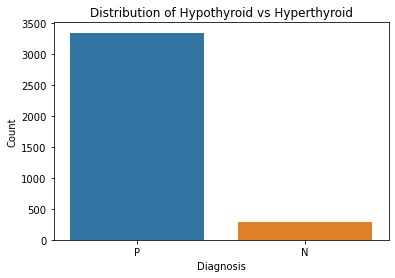

In [6]:
# Distribution of binaryClass (target variable)
sns.countplot(data=df, x='BINARYCLASS')
plt.title('Distribution of Hypothyroid vs Hyperthyroid')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()


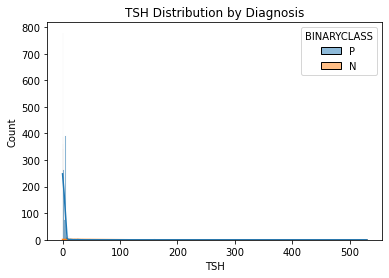

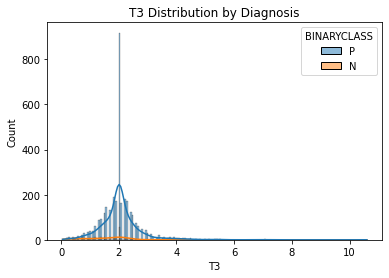

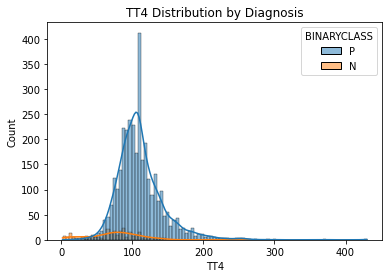

In [7]:
# Plot distributions of lab test values
# Visualize the distribution of lab test values (TSH, T3, TT4) for hypothyroid vs non-hypothyroid patients.
# These histograms will show how the values of each lab test differ between the two diagnosis classes (BINARYCLASS).
# The "hue" parameter differentiates the two classes (hypothyroid and negative), allowing us to observe patterns:
# - For example, higher TSH levels might indicate hypothyroidism.
# - T3 and TT4 distributions may overlap or shift based on diagnosis.
# This helps identify lab test features that are important for predicting thyroid conditions.
numeric_features = ['TSH', 'T3', 'TT4']

for feature in numeric_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=feature, hue='BINARYCLASS', kde=True)
    plt.title(f'{feature} Distribution by Diagnosis')
    plt.show()


In [8]:
# Filter out unrealistic age values (>100)
df = df[(df['AGE'] >= 0) & (df['AGE'] <= 100)]

# Verify the updated age range
print("Age range after filtering:", df['AGE'].min(), "to", df['AGE'].max())


Age range after filtering: 1 to 94


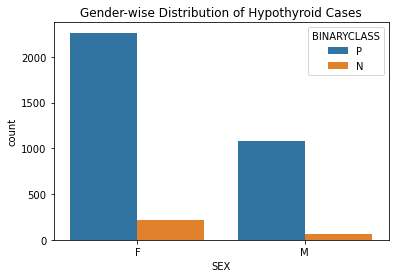

In [9]:
# Gender vs Diagnosis
sns.countplot(data=df, x='SEX', hue='BINARYCLASS')
plt.title('Gender-wise Distribution of Hypothyroid Cases')
plt.show()


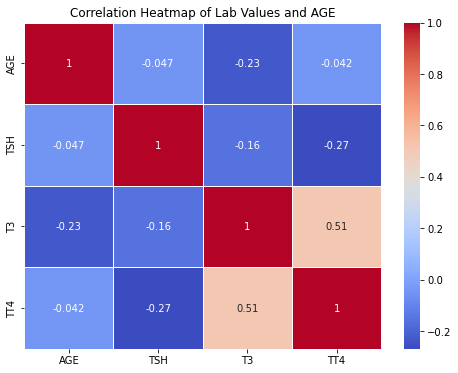

In [10]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
correlation = df[['AGE', 'TSH', 'T3', 'TT4']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Lab Values and AGE')
plt.show()


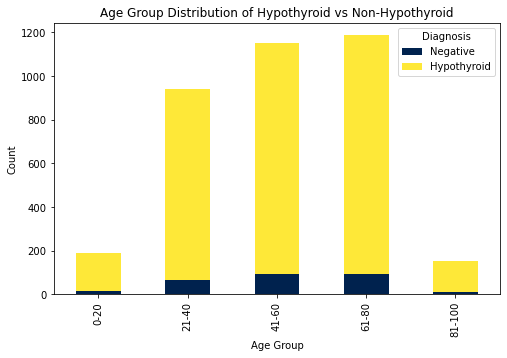

In [11]:
# Create age bins
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=[0, 20, 40, 60, 80, 100], 
                         labels=['0-20', '21-40', '41-60', '61-80', '81-100'])

# Stacked bar chart for age groups
age_group_counts = pd.crosstab(df['AGE_GROUP'], df['BINARYCLASS'])

age_group_counts.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='cividis')
plt.title('Age Group Distribution of Hypothyroid vs Non-Hypothyroid')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Diagnosis', labels=['Negative', 'Hypothyroid'])
plt.show()


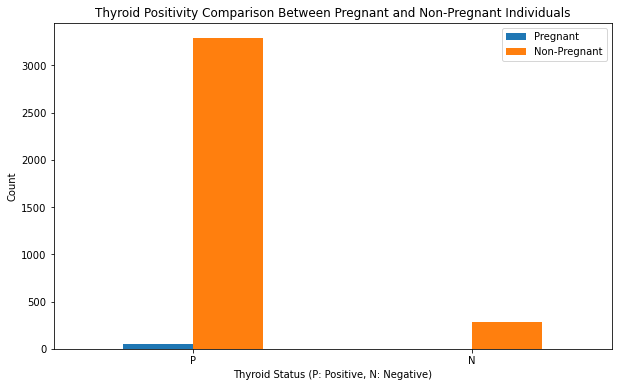

   Pregnant  Non-Pregnant
P        51          3289
N         0           280


In [12]:
# Filter data for pregnant and non-pregnant individuals
pregnant_data = df[df['PREGNANT'] == 'T']
non_pregnant_data = df[df['PREGNANT'] == 'F']

# Count thyroid positivity (e.g., 'P' for positive cases) for pregnant and non-pregnant
pregnant_thyroid_counts = pregnant_data['BINARYCLASS'].value_counts()
non_pregnant_thyroid_counts = non_pregnant_data['BINARYCLASS'].value_counts()

# Align indices to avoid mismatches
pregnant_thyroid_counts = pregnant_thyroid_counts.reindex(['P', 'N'], fill_value=0)
non_pregnant_thyroid_counts = non_pregnant_thyroid_counts.reindex(['P', 'N'], fill_value=0)

# Combine the two series into a DataFrame
analysis_df = pd.DataFrame({
    'Pregnant': pregnant_thyroid_counts,
    'Non-Pregnant': non_pregnant_thyroid_counts
})

# Visualize the comparison
analysis_df.plot(kind='bar', figsize=(10, 6))
plt.title('Thyroid Positivity Comparison Between Pregnant and Non-Pregnant Individuals')
plt.xlabel('Thyroid Status (P: Positive, N: Negative)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Display the DataFrame for review
print(analysis_df)



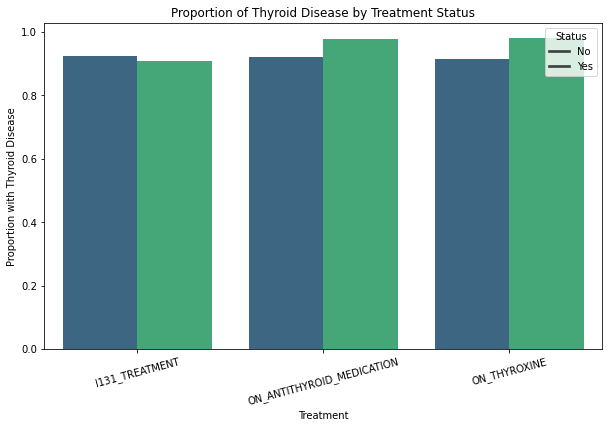

In [18]:
# Preparing data for the grouped bar chart (Treatment Analysis)
treatment_columns = ['ON_THYROXINE', 'ON_ANTITHYROID_MEDICATION', 'I131_TREATMENT']
treatment_analysis = df[treatment_columns + ['BINARYCLASS']].copy()

# Encoding the BINARYCLASS column to binary values (P=1, N=0)
treatment_analysis['BINARYCLASS'] = treatment_analysis['BINARYCLASS'].apply(lambda x: 1 if x == 'P' else 0)

# Melting data for visualization
melted_treatment_data = treatment_analysis.melt(
    id_vars='BINARYCLASS', 
    value_vars=treatment_columns, 
    var_name='Treatment', 
    value_name='Status'
)
# Grouping data
grouped_treatment_data = melted_treatment_data.groupby(['Treatment', 'Status'])['BINARYCLASS'].mean().reset_index()

# Plotting grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Treatment', 
    y='BINARYCLASS', 
    hue='Status', 
    data=grouped_treatment_data,
    palette='viridis'
)
plt.title('Proportion of Thyroid Disease by Treatment Status')
plt.xlabel('Treatment')
plt.ylabel('Proportion with Thyroid Disease')
plt.legend(title='Status', labels=['No', 'Yes'])
plt.xticks(rotation=15)
plt.show()

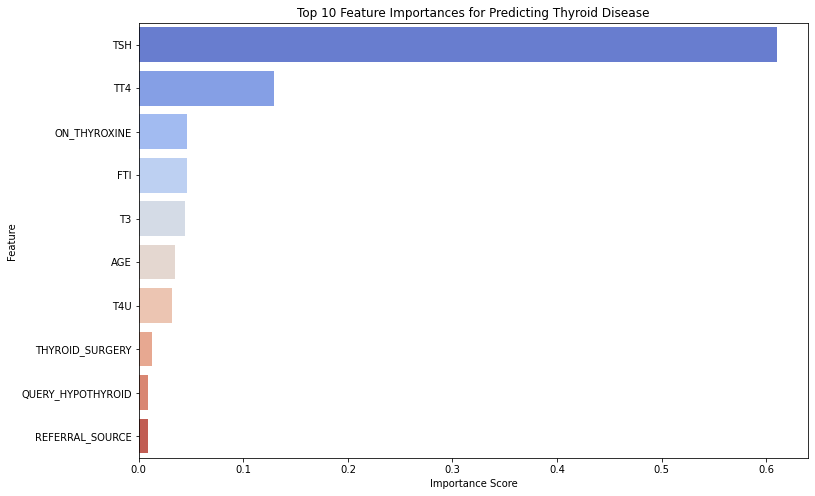

In [27]:
# Splitting the data again after cleaning
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Extracting feature importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10), palette='coolwarm')
plt.title("Top 10 Feature Importances for Predicting Thyroid Disease")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


